In [1]:
import numpy as np
from numpy import sin, pi, abs
from scipy.integrate import dblquad, trapz,quad, simps, romb
import matplotlib.pyplot as plt
from Data import Data
import torch
from mpl_toolkits.mplot3d import Axes3D

In [2]:
lower = 0.0001
upper = 2 * np.pi+lower
a = torch.unsqueeze(torch.linspace(lower, upper, 100), dim=1)
# print (a)
print (a.size())
a = a[1:-1]
# data_set = Data(128, lower, upper)
# x, y = data_set.get()
# print (type(x))
# print (a)
print (a.size())
print (a)

torch.Size([100, 1])
torch.Size([98, 1])
tensor([[0.0636],
        [0.1270],
        [0.1905],
        [0.2540],
        [0.3174],
        [0.3809],
        [0.4444],
        [0.5078],
        [0.5713],
        [0.6348],
        [0.6982],
        [0.7617],
        [0.8252],
        [0.8886],
        [0.9521],
        [1.0156],
        [1.0790],
        [1.1425],
        [1.2060],
        [1.2694],
        [1.3329],
        [1.3964],
        [1.4598],
        [1.5233],
        [1.5868],
        [1.6502],
        [1.7137],
        [1.7772],
        [1.8406],
        [1.9041],
        [1.9676],
        [2.0310],
        [2.0945],
        [2.1580],
        [2.2214],
        [2.2849],
        [2.3484],
        [2.4118],
        [2.4753],
        [2.5388],
        [2.6022],
        [2.6657],
        [2.7292],
        [2.7926],
        [2.8561],
        [2.9196],
        [2.9830],
        [3.0465],
        [3.1100],
        [3.1734],
        [3.2369],
        [3.3004],
        [3.3638],
     

In [13]:
# test the second term
# theta = np.linspace(0, 2*np.pi, 100)
# theta_prime = np.linspace(0, 2*np.pi, 100)
F = lambda theta, theta_prime: sin(theta)**2 * \
                               sin(theta_prime)**2 * abs(sin(theta - theta_prime))



In [14]:
dblquad(F, 0, 2*pi, lambda x: 0, lambda x: 2*pi)

(5.2359877537509005, 1.9544067031418422e-08)

In [15]:
data_set = Data(1000)
x, y = data_set.get()
matrix = data_set.matrix()
print (matrix.size())

# second_term = (4*pi**2/128**2)*torch.mm(torch.mm(y.T, matrix), y)
# print(second_term)

torch.Size([1000, 1000])


In [16]:
(4*pi**2/1000**2) * torch.mm(torch.mm(y.T, matrix), y)

tensor([[5.2255]])

In [4]:
# check first term
entropy = lambda theta: sin(theta)**2 * np.log(sin(theta)**2)
quad(entropy, 0, 2*pi)

(-1.2135795270174112, 7.007086022525755e-10)

In [11]:
data_set = Data(128)
_,y = data_set.get()
print (y.size())

torch.Size([128, 1])


In [12]:
(2*pi/len(y))*torch.mm(y.T, torch.log(y))

tensor([[-1.2041]])

In [3]:
# compare the vectorization and trapz

data_set = Data(128)
x,y = data_set.get()
x = x.numpy()
y = y.numpy()

In [5]:
f = y * np.log(y)
I = trapz(f.T,x.T)
print (I)

[-1.2135761]


In [9]:
vac = (2*pi/len(y)) * np.dot(y.T, np.log(y))
print (vac)

[[-1.204095]]


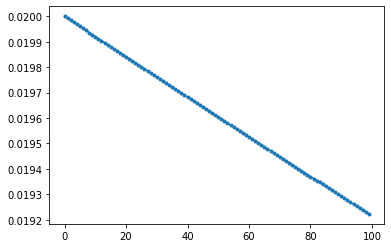

In [21]:
# test lr decay
ep = np.arange(0, 100, 1)
lr = 0.02 * 0.9996**ep
plt.plot(ep, lr)
plt.scatter(ep, lr, marker='.')

In [ ]:
lr1 = 0.02 * (1 / (1 + 0.0009 * ep))
plt.plot(ep, lr1)
plt.scatter(ep, lr1, ma)

In [6]:
0.92**10 * 0.02

0.008687769084472647

try to plot the 3D plot

In [2]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0, 2*pi, 256)
Y = np.linspace(4, 6, 15)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
print (X.shape)
print (Y.shape)
print (Z.shape)
print (X)
print (Y)
print (Z)
# 我需要把Z重写成一个数组

(15, 256)
(15, 256)
(15, 256)
[[0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]
 [0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]
 [0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]
 ...
 [0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]
 [0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]
 [0.         0.02463994 0.04927988 ... 6.23390542 6.25854536 6.28318531]]
[[4.         4.         4.         ... 4.         4.         4.        ]
 [4.14285714 4.14285714 4.14285714 ... 4.14285714 4.14285714 4.14285714]
 [4.28571429 4.28571429 4.28571429 ... 4.28571429 4.28571429 4.28571429]
 ...
 [5.71428571 5.71428571 5.71428571 ... 5.71428571 5.71428571 5.71428571]
 [5.85714286 5.85714286 5.85714286 ... 5.85714286 5.85714286 5.85714286]
 [6.         6.         6.         ... 6.         6.         6.        ]]
[[-0.7568025  -0.7568521  -0.75700088 ...  0.90169541  0.91047232
   0.91886658]
 

### try simpson's rule
we have 128 points, and the function is $f = sin^{2}(x) + log (sin^{2}(x))$


here is the exact result

In [23]:
x1 = lambda x: np.sin(x)**2 + np.log(sin(x)**2)
I1, error = quad(x1, 0, 2*np.pi)
print ("the exact result is", I1)

the exact result is -5.568751707624641


use trapezoidal rule

In [29]:
x_points = np.linspace(1e-10, 2*np.pi, 100)
y_points = np.sin(x_points)**2 + np.log(sin(x_points)**2)
# y_points = np.linspace(0.15, 0.16, 100)
I2 = trapz(y_points, x_points)
print ("the trapzoidal result is", I2)

the trapzoidal result is -8.640206159381428


use simpson's rule

In [30]:
I3 = simps(y_points, x_points)
print ("the simpson's rule", I3)

the simpson's rule -8.074723639402695


In [31]:
mm = np.dot (x_points, y_points.T) / 100 * 2*np.pi
print (mm)

-43.61355583857294


## try something interest

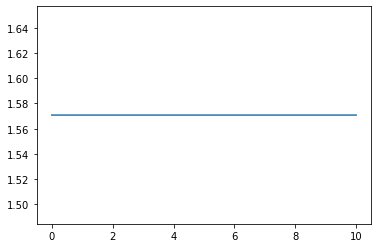

In [21]:
x = np.arange(0, 10-0.000001, 0.000001).reshape(-1, 1)
y = np.ones(len(x)).reshape(-1,1)
y = y - (1-(1/2*pi))
plt.plot(x,y)

In [28]:
L = len(y)
first_term = ((10-0.00000001) /(L-1)) * (np.dot(y.T, np.log(y)))
print (first_term)

[[7.09344353]]


In [29]:
f = y * np.log(y)
trapz(f.T, x.T)

array([7.09344298])

In [31]:
(1/2*pi)*np.log((1/2*pi))

0.709344454712778

In [32]:
# 更改第一个和最后一个值
y[0], y[-1] = 0.05, 0.05
L = len(y)
first_term_funny = ((10-0.00000001) /(L-1)) * (np.dot(y.T, np.log(y)))
print (first_term_funny)

[[7.09344353]]


In [33]:
# the result should be ture
first_term < first_term_funny

array([[False]])